In [54]:
import numpy as np
import pandas as pd

In [55]:
df = pd.read_csv('/content/archive (3).zip')

In [56]:
df.sample(5)

,text,spam
1091,Subject: attn : i presume this mail will not ...,1
2801,Subject: the national forum on corporate finan...,0
4862,Subject: fyi due to the out of town deliverie...,0
3880,"Subject: re : prc meeting date anne , thanks...",0
3820,Subject: re : f / u to dr . kaminski @ enron f...,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [58]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [59]:
df['spam'] = encoder.fit_transform(df['spam'])

In [60]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [61]:
df.isnull().sum()

,0
text,0
spam,0


In [62]:
df.duplicated().sum()

33

In [63]:
df = df.drop_duplicates(keep='first')

In [64]:
df.duplicated().sum()

0

In [65]:
df.shape

(5695, 2)

In [66]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [67]:
df['spam'].value_counts()

,count
spam,
0,4327
1,1368


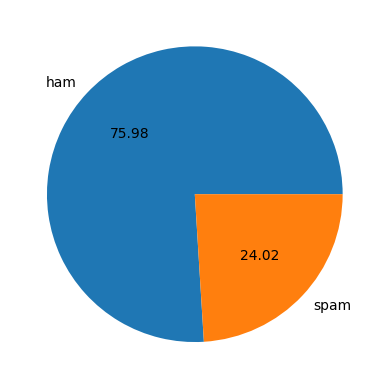

In [68]:
import matplotlib.pyplot as plt

# Assuming 'spam' column contains 0 for ham and 1 for spam
# Replace 'spam' with the actual column name if different
plt.pie(df['spam'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [69]:
import nltk

In [70]:
!pip install nltk

In [71]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [72]:
df['num_characters'] = df['text'].apply(len)

In [73]:
df.head()

,text,spam,num_characters
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [74]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [75]:
df.head()

,text,spam,num_characters,num_words
0,Subject: naturally irresistible your corporate...,1,1484,325
1,Subject: the stock trading gunslinger fanny i...,1,598,90
2,Subject: unbelievable new homes made easy im ...,1,448,88
3,Subject: 4 color printing special request add...,1,500,99
4,"Subject: do not have money , get software cds ...",1,235,53


In [76]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [77]:
df.head()

,text,spam,num_characters,num_words,num_sentences
0,Subject: naturally irresistible your corporate...,1,1484,325,11
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1
2,Subject: unbelievable new homes made easy im ...,1,448,88,4
3,Subject: 4 color printing special request add...,1,500,99,5
4,"Subject: do not have money , get software cds ...",1,235,53,9


In [78]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5695.000000,5695.000000,5695.000000
mean,1558.067076,328.214047,19.462511
std,2047.078711,419.654234,35.981993
min,13.000000,3.000000,1.000000
25%,508.500000,102.000000,7.000000
50%,979.000000,211.000000,12.000000
75%,1893.000000,403.000000,22.000000
max,43952.000000,8479.000000,1565.000000


In [79]:
df[df['spam'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4327.000000,4327.000000,4327.000000
mean,1634.200139,347.283799,19.838225
std,1965.016383,407.227757,38.124564
min,13.000000,3.000000,1.000000
25%,577.500000,120.000000,7.000000
50%,1122.000000,240.000000,13.000000
75%,2037.500000,440.500000,22.000000
max,43952.000000,8479.000000,1565.000000


In [80]:
df[df['spam'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1368.000000,1368.000000,1368.000000
mean,1317.257310,267.896199,18.274123
std,2271.372893,451.623124,28.130434
min,18.000000,5.000000,1.000000
25%,401.500000,80.000000,6.000000
50%,693.500000,141.000000,11.000000
75%,1250.250000,252.000000,18.000000
max,28432.000000,6131.000000,438.000000


In [81]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

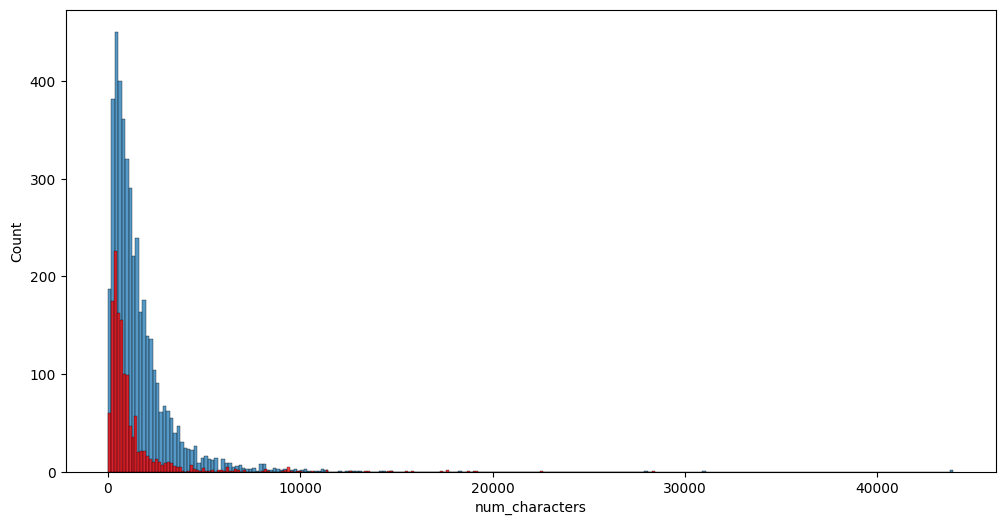

In [82]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['spam'] == 0]['num_characters'])
sns.histplot(df[df['spam'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

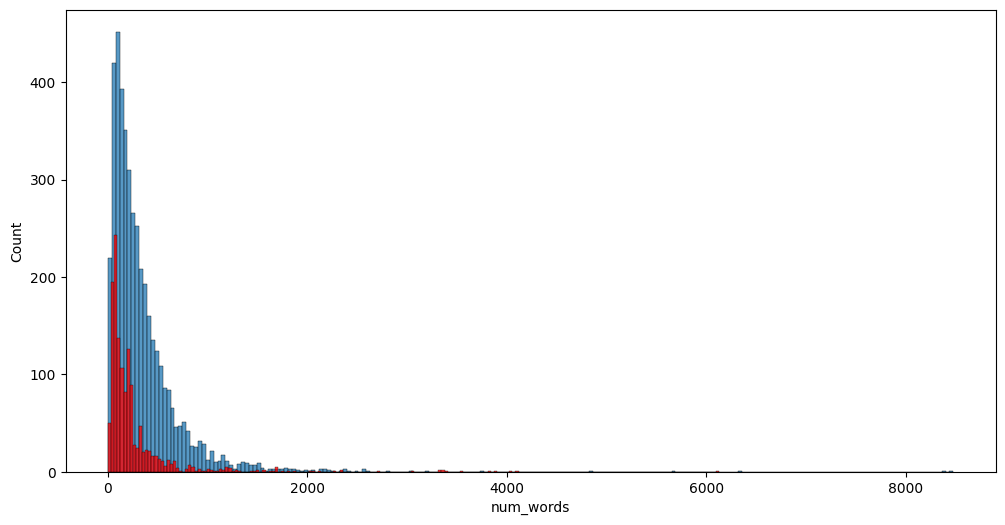

In [83]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['spam'] == 0]['num_words'])
sns.histplot(df[df['spam'] == 1]['num_words'],color='red')

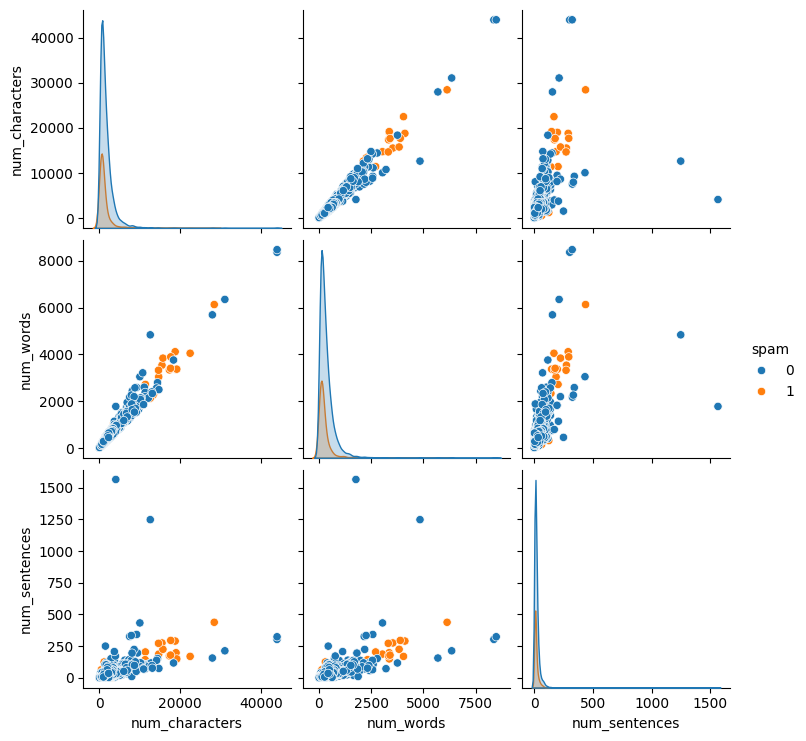

In [84]:
sns.pairplot(df,hue='spam')

In [91]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import string
from nltk.stem import PorterStemmer



def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text) # Tokenize the text

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in nltk.corpus.stopwords.words('english') and i not in string.punctuation: # Check if the word is a stop word or punctuation
            y.append(i)

    text = y[:]
    y.clear()
    ps = PorterStemmer() # Initialize PorterStemmer
    for i in text:
        y.append(ps.stem(i)) # Perform stemming


    return " ".join(y)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [92]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")



'gon na home soon want talk stuff anymor tonight k cri enough today'

In [93]:
df['text'][10]

"Subject: las vegas high rise boom  las vegas is fast becoming a major metropolitan city ! 60 +  new high rise towers are expected to be built on and around the las vegas strip  within the next 3 - 4 years , that ' s 30 , 000 + condominiums !  this boom has just begun ! buy first . . . early phase ,  pre - construction pricing is now available on las vegas high rises including  trump , cosmopolitan , mgm , turnberry , icon , sky , among others .  join the interest list :  http : / / www . verticallv . com  message has been sent to you by realty one highrise . learn more at www . verticallv . comif you  wish to be excluded from future mailings , please reply with the word remove in  the subject line . "

In [94]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [95]:
df['transformed_text'] = df['text'].apply(transform_text)

In [96]:
df.head()

,text,spam,num_characters,num_words,num_sentences,transformed_text
0,Subject: naturally irresistible your corporate...,1,1484,325,11,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,1,500,99,5,subject 4 color print special request addit in...
4,"Subject: do not have money , get software cds ...",1,235,53,9,subject money get softwar cd softwar compat gr...


In [98]:
spam_corpus = []
for msg in df[df['spam'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [99]:
len(spam_corpus)

174630

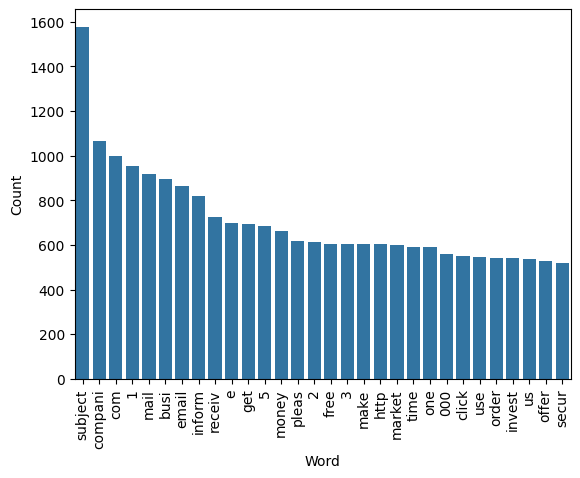

In [101]:
!pip install seaborn
!pip install pandas
!pip install matplotlib

from collections import Counter
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'spam_corpus' is your list of words

# Create a DataFrame from the Counter object
word_counts = Counter(spam_corpus).most_common(30)
df_word_counts = pd.DataFrame(word_counts, columns=['Word', 'Count'])

# Use the 'x' and 'y' keywords to specify the columns to plot
sns.barplot(x='Word', y='Count', data=df_word_counts)
plt.xticks(rotation='vertical')
plt.show()

In [104]:
ham_corpus = []
for msg in df[df['spam'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [105]:
len(ham_corpus)

702991

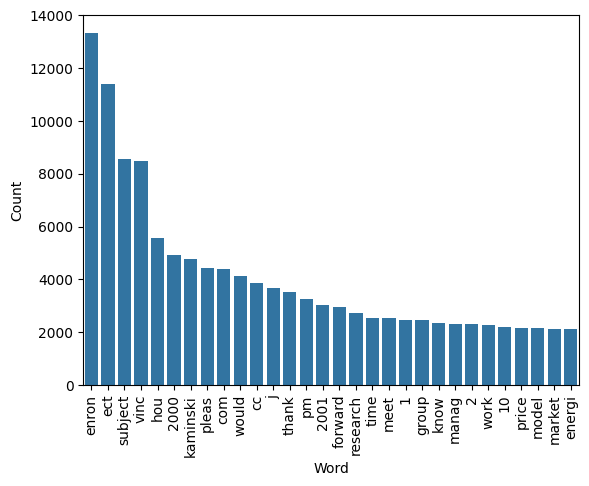

In [107]:
from collections import Counter
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Calculate word counts and create a DataFrame
word_counts = Counter(ham_corpus).most_common(30)
df_word_counts = pd.DataFrame(word_counts, columns=['Word', 'Count'])

# Use the 'x' and 'y' keywords to specify the columns to plot
sns.barplot(x='Word', y='Count', data=df_word_counts)
plt.xticks(rotation='vertical')
plt.show()

In [108]:
df.head()

,text,spam,num_characters,num_words,num_sentences,transformed_text
0,Subject: naturally irresistible your corporate...,1,1484,325,11,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,1,500,99,5,subject 4 color print special request addit in...
4,"Subject: do not have money , get software cds ...",1,235,53,9,subject money get softwar cd softwar compat gr...


In [109]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [110]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [111]:
X.shape

(5695, 3000)

In [112]:
y = df['spam'].values

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [115]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [116]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [117]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.95171202809482
[[837  12]
 [ 43 247]]
0.9536679536679536


In [118]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9850746268656716
[[846   3]
 [ 14 276]]
0.989247311827957


In [119]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9429323968393327
[[785  64]
 [  1 289]]
0.8186968838526912


In [120]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9429323968393327
[[785  64]
 [  1 289]]
0.8186968838526912


In [123]:
!pip install scikit-learn
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [124]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [126]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    """
    Trains a classifier and prints its accuracy, confusion matrix, and precision score.

    Args:
        clf: The classifier object.
        X_train: The training data.
        y_train: The training labels.
        X_test: The testing data.
        y_test: The testing labels.
    """
    from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")

In [128]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    """
    Trains a classifier and prints its accuracy, confusion matrix, and precision score.

    Args:
        clf: The classifier object.
        X_train: The training data.
        y_train: The training labels.
        X_test: The testing data.
        y_test: The testing labels.

    Returns:
        tuple: A tuple containing the accuracy and precision scores.
    """
    from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    # Return the accuracy and precision scores
    return accuracy_score(y_test, y_pred), precision_score(y_test, y_pred)

In [132]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.model_selection import train_test_split

# ... (your existing code for importing classifiers and defining clfs) ...

# Initialize empty lists to store accuracy and precision scores
accuracy_scores = []
precision_scores = []
model_names = []  # Add this line to store model names

# Assuming you have X and y data for training
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Iterate over the classifiers and train them
for model_name, clf in clfs.items():
    accuracy, precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    model_names.append(model_name) # Add model name to the list

# Create the performance DataFrame
performance_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracy_scores,
    "Precision": precision_scores
})

# Now you can display the DataFrame
performance_df

Accuracy: 0.9920983318700615
Confusion Matrix:
 [[841   2]
 [  7 289]]
Precision: 0.993127147766323
Accuracy: 0.9719051799824407
Confusion Matrix:
 [[834   9]
 [ 23 273]]
Precision: 0.9680851063829787
Accuracy: 0.9806848112379281
Confusion Matrix:
 [[839   4]
 [ 18 278]]
Precision: 0.9858156028368794
Accuracy: 0.9174714661984197
Confusion Matrix:
 [[759  84]
 [ 10 286]]
Precision: 0.772972972972973
Accuracy: 0.9771729587357331
Confusion Matrix:
 [[833  10]
 [ 16 280]]
Precision: 0.9655172413793104
Accuracy: 0.9771729587357331
Confusion Matrix:
 [[841   2]
 [ 24 272]]
Precision: 0.9927007299270073


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.961369622475856
Confusion Matrix:
 [[829  14]
 [ 30 266]]
Precision: 0.95
Accuracy: 0.9648814749780509
Confusion Matrix:
 [[823  20]
 [ 20 276]]
Precision: 0.9324324324324325
Accuracy: 0.9798068481123793
Confusion Matrix:
 [[843   0]
 [ 23 273]]
Precision: 1.0
Accuracy: 0.9561018437225637
Confusion Matrix:
 [[832  11]
 [ 39 257]]
Precision: 0.9589552238805971
Accuracy: 0.9798068481123793
Confusion Matrix:
 [[829  14]
 [  9 287]]
Precision: 0.9534883720930233


,Model,Accuracy,Precision
0,SVC,0.992098,0.993127
1,KN,0.971905,0.968085
2,NB,0.980685,0.985816
3,DT,0.917471,0.772973
4,LR,0.977173,0.965517
5,RF,0.977173,0.992701
6,AdaBoost,0.961370,0.950000
7,BgC,0.964881,0.932432
8,ETC,0.979807,1.000000
9,GBDT,0.956102,0.958955


In [135]:
performance_df1 = pd.melt(performance_df, id_vars = "Model") # Changed 'Algorithm' to 'Model'

In [136]:
performance_df1

,Model,variable,value
0,SVC,Accuracy,0.992098
1,KN,Accuracy,0.971905
2,NB,Accuracy,0.980685
3,DT,Accuracy,0.917471
4,LR,Accuracy,0.977173
5,RF,Accuracy,0.977173
6,AdaBoost,Accuracy,0.961370
7,BgC,Accuracy,0.964881
8,ETC,Accuracy,0.979807
9,GBDT,Accuracy,0.956102


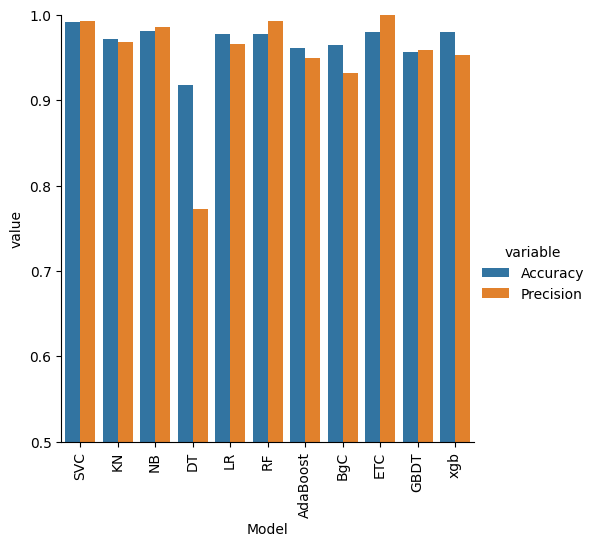

In [138]:
sns.catplot(x = 'Model', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [139]:
temp_df = pd.DataFrame({'Model':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)



In [140]:
temp_df = pd.DataFrame({'Model':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [141]:
new_df = performance_df.merge(temp_df,on='Model')

In [142]:
new_df_scaled = new_df.merge(temp_df,on='Model')

In [143]:
temp_df = pd.DataFrame({'Model':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)



In [144]:
new_df_scaled.merge(temp_df,on='Model')

,Model,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.992098,0.993127,0.992098,0.993127,0.992098,0.993127,0.992098,0.993127
1,KN,0.971905,0.968085,0.971905,0.968085,0.971905,0.968085,0.971905,0.968085
2,NB,0.980685,0.985816,0.980685,0.985816,0.980685,0.985816,0.980685,0.985816
3,DT,0.917471,0.772973,0.917471,0.772973,0.917471,0.772973,0.917471,0.772973
4,LR,0.977173,0.965517,0.977173,0.965517,0.977173,0.965517,0.977173,0.965517
5,RF,0.977173,0.992701,0.977173,0.992701,0.977173,0.992701,0.977173,0.992701
6,AdaBoost,0.961370,0.950000,0.961370,0.950000,0.961370,0.950000,0.961370,0.950000
7,BgC,0.964881,0.932432,0.964881,0.932432,0.964881,0.932432,0.964881,0.932432
8,ETC,0.979807,1.000000,0.979807,1.000000,0.979807,1.000000,0.979807,1.000000
9,GBDT,0.956102,0.958955,0.956102,0.958955,0.956102,0.958955,0.956102,0.958955


In [145]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [146]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [147]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [148]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.990342405618964
Precision 0.9896907216494846


In [149]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [150]:
from sklearn.ensemble import StackingClassifier

In [151]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [152]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9938542581211589
Precision 0.9898305084745763
